### Fashion Jerry

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For sentiment analyses?
from textblob import TextBlob

In [2]:
fashion = pd.read_csv('Amazon_Fashio.csv')

In [4]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176 entries, 0 to 3175
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    3176 non-null   int64 
 1   overall       3176 non-null   int64 
 2   verified      3176 non-null   bool  
 3   reviewTime    3176 non-null   object
 4   reviewerID    3176 non-null   object
 5   asin          3176 non-null   object
 6   reviewerName  3176 non-null   object
 7   reviewText    3160 non-null   object
 8   Color:        3095 non-null   object
 9   Size:         3102 non-null   object
dtypes: bool(1), int64(2), object(7)
memory usage: 226.5+ KB


In [4]:
fashion = fashion.drop('Unnamed: 0', axis=1)
fashion = fashion.rename(columns={"overall":"productRating","asin":"productID", "Size:":"size"})

In [5]:
fashion['reviewTime'] = pd.to_datetime(fashion['reviewTime'])

### Datetime Analysis

##### Amount of reviews per year and month

In [7]:
fashion['year'] = fashion['reviewTime'].dt.year
fashion['year_month'] = fashion['reviewTime'].apply(lambda x: x.strftime('%B-%Y'))

In [8]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,year_month
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015


In [8]:
review_count_m_y  = fashion.groupby(['year_month']).count()[['reviewText']]
review_count_m_y

,reviewText
year_month,
April-2016,48
April-2017,206
April-2018,128
August-2014,2
August-2016,91
August-2017,152
December-2009,4
December-2012,4
December-2014,6


##### Average rating per year and month

In [9]:
avg_rating_m_y = fashion.groupby(['year_month']).mean()[['productRating']]
avg_rating_m_y

,productRating
year_month,
April-2016,4.333333
April-2017,4.669903
April-2018,4.470588
August-2014,5.000000
August-2016,4.648352
August-2017,4.105263
December-2009,4.000000
December-2012,3.000000
December-2014,4.000000


##### Visualise findings

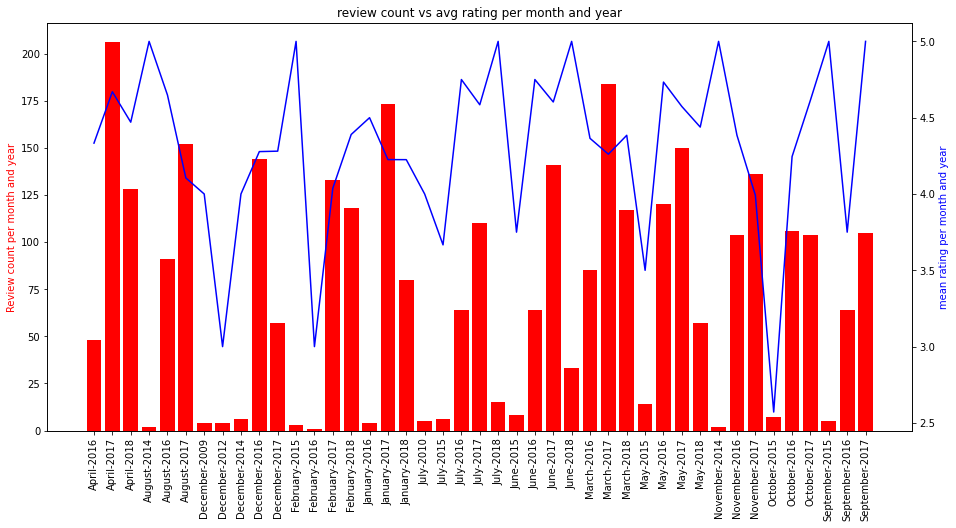

In [10]:
axes1 = review_count_m_y
axes2 = avg_rating_m_y

key = [key for key, df in fashion.groupby('year_month')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.reviewText, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count per month and year', color = 'r')
ax2.set_ylabel('mean rating per month and year', color = 'b')
ax1.set_title('review count vs avg rating per month and year')
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('rev_count_vs_rating.png', dpi=100)
plt.show()

In [14]:
fashion.groupby('year').count()[['reviewText']]

,reviewText
year,
2009,4
2010,5
2012,4
2014,10
2015,43
2016,895
2017,1651
2018,548


### Simple sentiment analysis

In [11]:
# get polarity of the text
def the_sentiment(text):
    blob = TextBlob(text)
    return blob.polarity

# add label to the polarity
def the_sentiment_label(text):
    if the_sentiment(text)>0:
        polarity_label = 'positive'
    elif the_sentiment(text)<0:
        polarity_label = 'negative'
    else:
        polarity_label = 'neutral'
    return polarity_label

#### add columns: sentiment and sentimentLabel

In [12]:
fashion['reviewText'] = fashion['reviewText'].astype(str)
fashion['sentiment'] = fashion['reviewText'].apply(the_sentiment)
fashion['sentimentLabel'] = fashion['reviewText'].apply(the_sentiment_label)

In [17]:
fashion.head()

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,year_month,sentiment,sentimentLabel
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015,1.0,positive
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015,1.0,positive
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015,1.0,positive
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015,1.0,positive
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015,1.0,positive


#### Number of each label

In [21]:
fashion.groupby(['productRating']).count()[['sentiment']]

,sentiment
productRating,
1,117
2,93
3,337
4,471
5,2158


In [18]:
fashion.groupby(['sentimentLabel']).count()[['sentiment']]

,sentiment
sentimentLabel,
negative,198
neutral,178
positive,2800


#### Visualise productRating vs sentiment

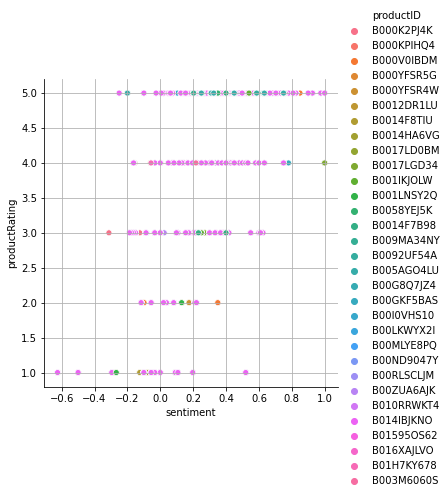

In [19]:
sns.relplot(x = 'sentiment', y='productRating', hue = 'productID', data = fashion)
plt.grid()
plt.show()

#### Find Number of genuine good, bad and neutral ratings

In [16]:
genuine_good_rating = fashion[(fashion['sentimentLabel']=='positive') & (fashion['productRating']>3)]
len(genuine_good_rating)

2439

In [17]:
genuine_bad_rating = fashion[(fashion['sentimentLabel']=='negative') & (fashion['productRating']<3)]
len(genuine_bad_rating)

83

In [18]:
genuine_neutral_rating = fashion[(fashion['sentimentLabel']=='neutral') & (fashion['productRating']==3)]
len(genuine_neutral_rating)

20

In [19]:
genuine_df1 = genuine_good_rating.append(genuine_bad_rating)
fashion_genuine = genuine_df1.append(genuine_neutral_rating)
fashion_genuine

,productRating,verified,reviewTime,reviewerID,productID,reviewerName,reviewText,Color:,size,year,year_month,sentiment,sentimentLabel
0,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Orange,Big Boys,2015,September-2015,1.0,positive
1,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Black (37467610) / Red/White,Big Boys,2015,September-2015,1.0,positive
2,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Gray Logo,Big Boys,2015,September-2015,1.0,positive
3,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue (37867638-99) / Yellow,Big Boys,2015,September-2015,1.0,positive
4,5,True,2015-09-04,ALJ66O1Y6SLHA,B000K2PJ4K,Tonya B.,Great product and price!,Blue/Pink,Big Boys,2015,September-2015,1.0,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2214,3,True,2017-01-31,AODFGQL9CC7G7,B005AGO4LU,ZS87,Squeaky,Racer Blue/Obsidian/Blue Tint,7.5 B(M) US,2017,January-2017,0.0,neutral
2439,3,True,2018-01-09,A3U0BBRU2Q85LE,B010RRWKT4,Alix gray,"On the left shoe, there were two stained yello...",Blue Tint/Green Glow/Hasta/White,9.5 M US,2018,January-2018,0.0,neutral
2619,3,True,2017-01-31,AODFGQL9CC7G7,B010RRWKT4,ZS87,Squeaky,Racer Blue/Obsidian/Blue Tint,7.5 M US,2017,January-2017,0.0,neutral
2815,3,True,2018-01-09,A3U0BBRU2Q85LE,B014IBJKNO,Alix gray,"On the left shoe, there were two stained yello...",Blue Tint/Green Glow/Hasta/White,9.5 M US,2018,January-2018,0.0,neutral


### Analysis on Product (productID)

#### Number of products

In [24]:
len(fashion.groupby('productID'))

31

#### Number of reviews per product

In [32]:
rev_per_prod = fashion.groupby('productID').count()[['reviewText']]
rev_per_prod = rev_per_prod.rename(columns={'reviewText':'reviewCount'})
rev_per_prod

,reviewCount
productID,
B000K2PJ4K,10
B000KPIHQ4,7
B000V0IBDM,7
B000YFSR4W,36
B000YFSR5G,56
B0012DR1LU,4
B0014F7B98,374
B0014F8TIU,8
B0014HA6VG,4


#### Sort review count per product

In [33]:
rev_per_prod.sort_values('reviewCount', ascending=False)

,reviewCount
productID,
B009MA34NY,377
B005AGO4LU,376
B010RRWKT4,376
B0092UF54A,376
B014IBJKNO,375
B0014F7B98,374
B0058YEJ5K,367
B001IKJOLW,365
B000YFSR5G,56


#### Genuine Sentiment Label per product

In [23]:
GSL_prod = fashion_genuine.groupby(['productID', 'sentimentLabel']).count()[['sentiment']]
GSL_prod['sentimentLabel'] = GSL_prod.index.get_level_values(1)
GSL_prod['productID']=GSL_prod.index.get_level_values(0)
GSL_prod = GSL_prod.rename(columns={"sentiment":"sentimentCount"})
GSL_prod

sentimentCount sentimentLabel   productID
productID  sentimentLabel                                           
B000K2PJ4K positive                     8       positive  B000K2PJ4K
B000KPIHQ4 negative                     1       negative  B000KPIHQ4
           positive                     5       positive  B000KPIHQ4
B000V0IBDM negative                     1       negative  B000V0IBDM
           positive                     5       positive  B000V0IBDM
B000YFSR4W negative                     2       negative  B000YFSR4W
           neutral                      2        neutral  B000YFSR4W
           positive                    18       positive  B000YFSR4W
B000YFSR5G negative                     2       negative  B000YFSR5G
           neutral                      2        neutral  B000YFSR5G
           positive                    30       positive  B000YFSR5G
B0012DR1LU positive                     4       positive  B0012DR1LU
B0014F7B98 negative                     9       negative  B0014F7B98
           neutral                      2        neutral  B0014F7B98
           positive                   291       positive  B0014F7B98
B0014F8TIU negative                     4       negative  B0014F8TIU
           positive                     2       positive  B0014F8TIU
B0014HA6VG positive                     2       positive  B0014HA6VG
B0017LD0BM positive                     4       positive  B0017LD0BM
B0017LGD34 positive                     4       positive  B0017LGD34
B001IKJOLW negative                     9       negative  B001IKJOLW
           neutral                      2        neutral  B001IKJOLW
           positive                   285       positive  B001IKJOLW
B001LNSY2Q negative                     1       negative  B001LNSY2Q
           positive                     4       positive  B001LNSY2Q
B003M6060S positive                     1       positive  B003M6060S
B0058YEJ5K negative                     9       negative  B0058YEJ5K
           neutral                      2        neutral  B0058YEJ5K
           positive                   287       positive  B0058YEJ5K
B005AGO4LU negative                     9       negative  B005AGO4LU
           neutral                      2        neutral  B005AGO4LU
           positive                   293       positive  B005AGO4LU
B0092UF54A negative                     9       negative  B0092UF54A
           neutral                      2        neutral  B0092UF54A
           positive                   293       positive  B0092UF54A
B009MA34NY negative                     9       negative  B009MA34NY
           neutral                      2        neutral  B009MA34NY
           positive                   294       positive  B009MA34NY
B00G8Q7JZ4 positive                     7       positive  B00G8Q7JZ4
B00GKF5BAS positive                     1       positive  B00GKF5BAS
B00I0VHS10 positive                     2       positive  B00I0VHS10
B00LKWYX2I positive                     1       positive  B00LKWYX2I
B00MLYE8PQ positive                     1       positive  B00MLYE8PQ
B00ND9047Y positive                     1       positive  B00ND9047Y
B00RLSCLJM positive                     8       positive  B00RLSCLJM
B010RRWKT4 negative                     9       negative  B010RRWKT4
           neutral                      2        neutral  B010RRWKT4
           positive                   294       positive  B010RRWKT4
B014IBJKNO negative                     9       negative  B014IBJKNO
           neutral                      2        neutral  B014IBJKNO
           positive                   292       positive  B014IBJKNO
B01595OS62 positive                     1       positive  B01595OS62
B016XAJLVO positive                     1       positive  B016XAJLVO

#### Visualise findings

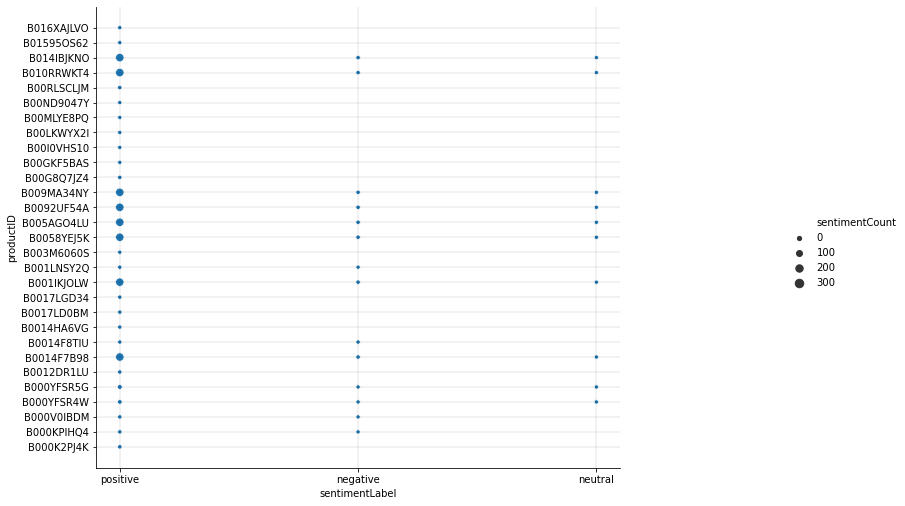

In [25]:
sns.relplot(x = 'sentimentLabel', y='productID', size ='sentimentCount', data = GSL_prod)
# plt.scatter(x = fashion['sentimentLabel'], y=fashion['productID'], s = idky['sentiment'])
plt.grid(color='black', linestyle='-', linewidth=0.1)
fig = plt.gcf()
fig.set_size_inches(15.5, 7.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

### Analysis on reviewers (reviewerID)

#### Number of reviewers

In [105]:
len(fashion.groupby('reviewerID'))

406

#### Review count per reviewer

In [31]:
R_C = fashion.groupby('reviewerID').count()[['reviewText']].sort_values('reviewText',ascending=False)
R_C = R_C.rename(columns={'reviewText':'reviewCount'})
R_C

,reviewCount
reviewerID,
AT7UEQ7UJB0RU,16
A37K0VP2H8FKOU,16
A3OP70LPLALBKN,16
A3BN0MRGRDKM0J,10
A2YI41MCJB2QCV,9
...,...
A3GJ3DJU1RXOHN,5
AGZ5OOZVDO194,5
A3LJRA2I5F34W5,5


### Most review done in a day per ID

In [26]:
time_id = fashion_genuine.groupby(['reviewTime', 'reviewerID']).count().sort_values('productRating', ascending=False)[['productRating']]
time_id = time_id.rename(columns={"productRating":"reviewCount"})
time_id

,,reviewCount
reviewTime,reviewerID,
2017-11-27,A3OP70LPLALBKN,16
2017-03-08,A37K0VP2H8FKOU,16
2017-05-19,AT7UEQ7UJB0RU,16
2017-03-18,A2KMWD77XBGZ8K,8
2017-05-29,AJWKZNI5VHW86,8
...,...,...
2018-02-01,A3VGHF7VNFBMCQ,1
2014-12-31,A1Y01U6OZLZE7I,1
2017-12-18,A1EZN3E9R322YJ,1


### Analysis on product ratings (productRating)
#### visualize


In [27]:
axes1 = fashion_genuine.groupby('productID').count()
axes2 = fashion_genuine.groupby('productID').mean()

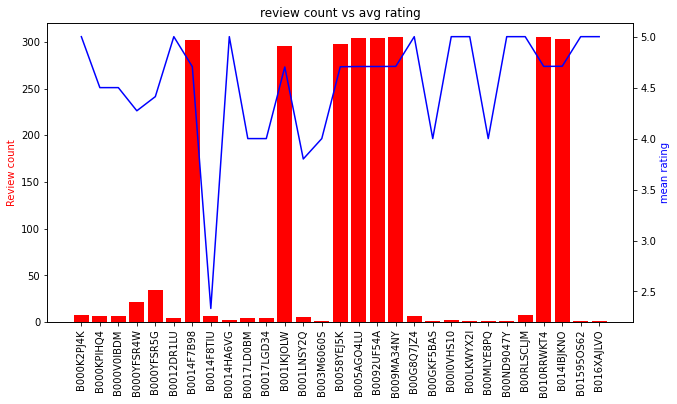

In [29]:
key = [key for key, df in fashion_genuine.groupby('productID')]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(key, axes1.productRating, color = 'r')
ax2.plot(key, axes2.productRating, color = 'b')
ax1.set_xticklabels(key, rotation = 90)
ax1.set_ylabel('Review count', color = 'r')
ax2.set_ylabel('mean rating', color = 'b')
ax1.set_title('review count vs avg rating')
fig = plt.gcf()
fig.set_size_inches(10.5, 5.5)
fig.savefig('test2png.png', dpi=100)
plt.show()